In [74]:
# IMPORT LIBRARIES 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from dotenv import load_dotenv
load_dotenv()
UR_API_KEY = os.getenv('DB_ID')
UR_API_SECRET = os.getenv('DB_SECRET')
USERNAME = os.getenv('DB_USER')


In [75]:
# log it to spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth

token = oauth2.SpotifyClientCredentials(
    client_id=UR_API_KEY,
    client_secret=UR_API_SECRET)
sp = spotipy.Spotify(client_credentials_manager=token)


In [53]:
# user authorization on spotipy in order to push our new playlists

import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import spotipy.util as util

cid = UR_API_KEY  # Client ID;
secret = UR_API_SECRET  # Client Secret;
username =USERNAME   # got from Spotify->account settings
#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'
redirect_uri = 'http://localhost:3000/callback'  # works on 3000,8888 as well
client_credentials_manager = SpotifyClientCredentials(
    client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)
if token:
 sp = spotipy.Spotify(auth=token)
else:
 print("Can't get token for", username)
# results = sp.current_user_saved_tracks()


In [76]:
# get a list with music genres
genres = sp.recommendation_genre_seeds()
atmosferika = [ "your genres here"]
dynata = ["Aggrotech",
          "Dark Electro-industrial",
          "electro-industrial",
          "Dark Electro",
          'Ebm',
          "Industrial"
          ]
# get every artist from a genre
def get_artists_from_genre(genrelist):
    artists = []

    for genre in genrelist:
        results = sp.search(q='genre:' + genre, type='artist', limit=50)
        for i, t in enumerate(results['artists']['items']):
            artists.append(f"{t['name']}__{genre}")

    return artists
# get every song from an artist
def get_songs_from_genre(genrelist):
    artistlist = get_artists_from_genre(genrelist)
    songs = []
    songs_names = []
    songs_artists = []
    Audio_Features = []
    genre = []
    for artist in artistlist:
        results = sp.search(
            q='artist:' + "".join(artist.split("__")[0]), type='track', limit=20)
        
        for i, t in enumerate(results['tracks']['items']):
            songs_artists.append(artist.split("__")[0])
            genre.append(artist.split("__")[1])
            songs.append(t['id'])
            songs_names.append(t['name'])
            Audio_Features.append(sp.audio_features(t['id'])[0])
          

    return {'songs': songs, 'songs_names': songs_names, "genres": genre, 'songs_artists': songs_artists, 'Audio_Features': Audio_Features}


songslist_dynata = get_songs_from_genre(dynata)

songslist_dynata


{'songs': ['0WBngsnJI4Xug3GtECPBJ5',
  '2Hs66TBwVLQAt4SHrNCt9I',
  '6XlHrPzxRAo11ninnMSU5m',
  '79QmTXeTLrjJryxrqUrrNC',
  '3Xgb8T8B7873IUtTT5Kpe4',
  '2tSN7oOGflPGtl7SGkuGVc',
  '6TluDgFgZ6SZvdqYSKWYMU',
  '2muHex4C1u6HlqLyBI5LAA',
  '3lpqas46DcfgYfc38A7f7D',
  '0S5wwKDHMvBpCO9f70kgCC',
  '5SVUBnA6PRf9fucc8r5UHG',
  '7KZ9xOX74xbwFoVXarjG2B',
  '4qEpDUsyVWlWXNQKB78zJO',
  '15e8z9wTRfxpgnwVylNfiK',
  '0g1bfdcO6PKM4VEH8UFptC',
  '5VUR4JDGbnFdvAfDdpAnKS',
  '5r3MwgG2J5mg4tCRCnxwIh',
  '55GTpydD4YFoA6CdupNGJX',
  '6Twcf2DWk4HtAQz5MetFyy',
  '5kVmj165jMP67UmajE8gnR',
  '0i4XYXDNChYcC2MxKrYTtk',
  '5gW2tYk3grW2Wkuo2O05rL',
  '2lPG7ZbWocZRJ47XgPQeqM',
  '2IhIMTBwCX28qWZjM1we76',
  '2V5mqIZ3gjFbiM3rIvRjvd',
  '18t2NbSkKmRzEfFEV4J2RZ',
  '46jPEdTapr8OWTCORmK20l',
  '2x5nlJMnw6TSK72GDBAt3R',
  '4jhWtD4SUTGkL0gdT5BGsS',
  '0nCzFCNK7zCuLhZVEzivDA',
  '59YX0Ut7ba47EMQzI36cSa',
  '6FHAIWUV8TqOOtE2JVunKD',
  '47ZNoxHHodEswuXYsoJDKV',
  '3l0qJQ8N6LcoDVhJ3sTpd8',
  '7gRvwiKeIQiApsE8702tXC',
  '40LJfrd6

In [106]:
songslist_dynata2 = songslist_dynata.copy()

In [107]:
# detect missing values 
# songs_df = pd.DataFrame(songslist_dynata2)
# songs_df.loc[songs_df["Audio_Features"].isna()]
for i in range(len(songslist_dynata2['Audio_Features'])):
    if songslist_dynata2['Audio_Features'][i] is None:
        print(i)
    #    songslist_dynata2['Audio_Features'].pop(i)
    #    songslist_dynata2['songs'].pop(i)
    #    songslist_dynata2['songs_names'].pop(i)
    #    songslist_dynata2['songs_artists'].pop(i)
    #    songslist_dynata2['genres'].pop(i)


In [108]:

print(len(songslist_dynata2["songs"]))
print(len(songslist_dynata2["songs_names"]))
print(len(songslist_dynata2["songs_artists"]))
print(len(songslist_dynata2["genres"]))
print(len(songslist_dynata2["Audio_Features"]))


4105
4105
4105
4105
4105


In [109]:
# convert all to dataframe

Audio_Features_df = pd.DataFrame(songslist_dynata2["Audio_Features"]
             )

songs_df = pd.DataFrame(
    {'id': songslist_dynata2["songs"], 'song_name': songslist_dynata2["songs_names"], 'artist': songslist_dynata2["songs_artists"] , 'genre': songslist_dynata2["genres"]})
# merge the two dataframes
songslist_dynata2 = pd.merge(songs_df, Audio_Features_df, on='id')




In [89]:
# save as csv
songslist_dynata2.to_csv('songslist_dynata2.csv')


In [110]:
    # clean the data
songslist_dynata2 = songslist_dynata2.drop(
    ['analysis_url','genre' ,'track_href', 'type', 'uri', 'id_y', 'duration_ms', 'time_signature', ], axis=1, errors='ignore')
songslist_dynata2.rename(columns={'id_x': 'id'}, inplace=True)
songslist_dynata2["fullname"] = songslist_dynata2["song_name"] + " - " + songslist_dynata2["artist"]
songslist_dynata2.drop_duplicates(subset="fullname", keep=False, inplace=True)
songslist_dynata2.drop(['song_name', 'artist'], axis=1, inplace=True)
songslist_dynata2.set_index('id', inplace=True)


In [111]:
# SCALING DATA
songslist_dynata2 = songslist_dynata2.drop(['fullname'], axis=1, errors='ignore')
scaler = MinMaxScaler()
songs_scaled = scaler.fit_transform(songslist_dynata2)
songs_scaled = pd.DataFrame(
    songs_scaled, columns=songslist_dynata2.columns, index=songslist_dynata2.index)



In [112]:
# remove low energy songs
songs_scaled = songs_scaled[songs_scaled['energy'] > 0.2]
# remove low danceability songs
songs_scaled = songs_scaled[songs_scaled['danceability'] > 0.3]


c:\Users\mrpal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrpal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrpal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrpal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0, 0.5, 'Silhouette score')

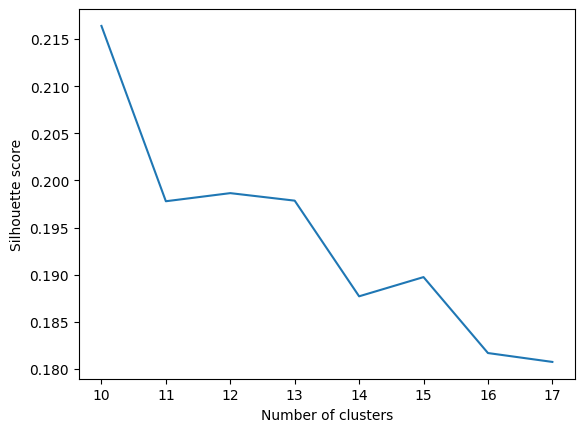

In [113]:
# validation through silhouette score
from sklearn.metrics import silhouette_score
# run it for 6 to 30 clusters and plot it
silhouette_scores = []
#apply the k mean algorithm for any possible number of k to choose the best one
for i in range(10, 18):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(songs_scaled)
    silhouette_scores.append(silhouette_score(songs_scaled, km.labels_))

plt.plot(range(10, 18), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")


c:\Users\mrpal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: >

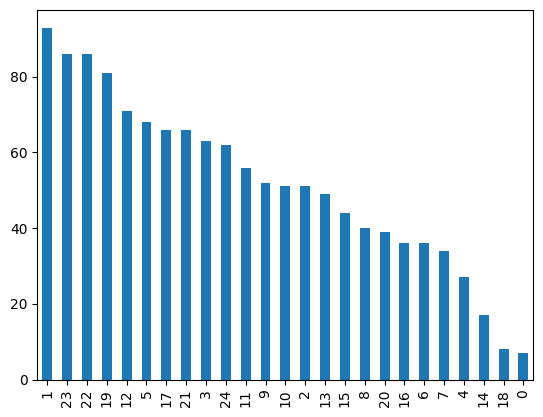

In [114]:
# RUN THE KMEANS ALGORITHM MULTIPLE TIMES IN ORDER TO GET THE BEST inertia_
from sklearn.cluster import KMeans
# for i in range(30):
#     km = KMeans(n_clusters=12, random_state=i)
#     km.fit(songs_scaled)
#     print(i, km.inertia_)
# we go for random_state=0
km = KMeans(n_clusters=25, random_state=0
            )
km.fit(songs_scaled)
songs_scaled["cluster"] = km.labels_
songs_scaled["cluster"].value_counts()
songs_scaled["cluster"].value_counts().plot(kind="bar")

In [ ]:
# GaussianMixture version

# from sklearn.mixture import GaussianMixture
# from numpy import unique
# from numpy import where
# from matplotlib import pyplot

# # define the model
# gaussian_model = GaussianMixture(n_components=12)

# # train the model
# gaussian_model.fit(songs_scaled)

# # assign each data point to a cluster
# gaussian_result = gaussian_model.predict(songs_scaled)

# # get all of the unique clusters
# gaussian_clusters = unique(gaussian_result)
# for gaussian_cluster in gaussian_clusters:
#     # get data points that fall in this cluster
#     index = where(gaussian_result == gaussian_clusters)
#     # make the plot

# songs_scaled["cluster"] = gaussian_result
# # show the Gaussian Mixture plot
# songs_scaled["cluster"].value_counts()
# songs_scaled["cluster"].value_counts().plot(kind="bar")


In [115]:
songs_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1289 entries, 5wyWhggVKwqYeldZ6N0VV2 to 27U7qdO306xO6PzcO3wceL
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1289 non-null   float64
 1   energy            1289 non-null   float64
 2   key               1289 non-null   float64
 3   loudness          1289 non-null   float64
 4   mode              1289 non-null   float64
 5   speechiness       1289 non-null   float64
 6   acousticness      1289 non-null   float64
 7   instrumentalness  1289 non-null   float64
 8   liveness          1289 non-null   float64
 9   valence           1289 non-null   float64
 10  tempo             1289 non-null   float64
 11  cluster           1289 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 125.9+ KB


In [116]:
#choosing the best clusters
for i in range(25):
    print("d "+str(i) +"    "+str(songs_scaled.loc[songs_scaled["cluster"]
          == i].tempo.mean()))



d 0    0.42059328187322237
d 1    0.4069193531117564
d 2    0.43611603345904
d 3    0.4486353133289324
d 4    0.4888987795527319
d 5    0.31460370169620633
d 6    0.3998554540129618
d 7    0.4813301713396965
d 8    0.41616159548537845
d 9    0.4456082437965377
d 10    0.4364346533458854
d 11    0.610148046042373
d 12    0.42683916793955906
d 13    0.4754539178447165
d 14    0.37886720256555695
d 15    0.47363230982139726
d 16    0.3478831063495962
d 17    0.42693351609855035
d 18    0.6123404168214998
d 19    0.4256664903920208
d 20    0.4830834926884003
d 21    0.41976795917327364
d 22    0.40625646765844864
d 23    0.48466378575585234
d 24    0.30390059819628873


In [130]:
final = songs_scaled.loc[(songs_scaled["cluster"]
                 == 11) | (songs_scaled["cluster"]
                 == 18)]
final2 = final.loc[(final["energy"] > 0.7) & (final["danceability"] > 0.4)]
final2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 3xu94vJFC9JHVezQvQxBm1 to 4odoLyHnSx2jIcXs16IvsV
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      40 non-null     float64
 1   energy            40 non-null     float64
 2   key               40 non-null     float64
 3   loudness          40 non-null     float64
 4   mode              40 non-null     float64
 5   speechiness       40 non-null     float64
 6   acousticness      40 non-null     float64
 7   instrumentalness  40 non-null     float64
 8   liveness          40 non-null     float64
 9   valence           40 non-null     float64
 10  tempo             40 non-null     float64
 11  cluster           40 non-null     int32  
dtypes: float64(11), int32(1)
memory usage: 3.9+ KB


In [131]:
final2.reset_index().to_csv('cluster_bpm_industrial.csv')


In [133]:
songs_raw = pd.read_csv('cluster_bpm_industrial.csv')
songs_raw
# create a playlist for the songs raw 
sp.user_playlist_create("11133611811", "cluster_bpm_industrial",
                        public=True, description=None)
playlist_id = sp.user_playlists("11133611811")['items'][0]['id']

In [134]:
ids = songs_raw['id'].tolist()
 # prevent a 400 error
try:
    sp.user_playlist_add_tracks("11133611811", playlist_id, ids)
    print("cluster created")
except:
     print("error")


cluster created


In [ ]:
# create a playlist for each cluster
# songs_raw = songs_scaled.reset_index()
# songs_raw
# for i in range(12):
#     ids = songs_raw[songs_raw["fullname"].isin(cluster_dict[i])]["id"].tolist()

#    # maximun 100 songs per playlist
#     if len(ids) > 100:
#         ids = ids[:100]
#         sp.user_playlist_create(USERNAME, "cluster_" + str(i), public=True, description=None)
#         playlist_id = sp.user_playlists(USERNAME)["items"][i]["id"]
        
    
#         # prevent a 400 error 
#         try: 
#             sp.user_playlist_add_tracks(USERNAME, playlist_id, ids)
#             print("cluster_" + str(i) + " created")
#         except:
#             print("error")  
    
#find the id through the first dataframe

